#  Re-interpretation toy example

Author: Stephen Menary, University of Manchester (sbmenary@gmail.com)

This notebook aims to provide a minimal example demonstrating the main techniques we use to perform a re-interpretation at ATLAS. The main topics considered will be:
- create a toy model, containing a SM prediction and a BSM signal model (with a single parameter)
- create a likelihood function, which accounts for data correlations and systematic uncertainties
- define the profile likelihood ratio (PLR) test-statistic which can be used to perform hypothesis tests
- study the expected distribution of the PLR
- use this to define confidence levels (CL)
- use the CLs method

## 1. Overview of limit setting

When setting confidence limits, we use the following procedure:
1. Define the **likelihood function**
2. Use the likelihood to define a **test statistic**
3. Understand, either using asymptotic formulae or psuedo-experiments, how we **expect the test statistic to be distributed** when different signal hypotheses are true
4. Compare the observed value of the test statistic, with the expected distribution, to derive the **confidence level**, for every signal hypothesis
5. **Exclude signal hypotheses** if their observed confidence levels fall below a pre-defined threshold

The sections below use a toy model to demonstrate this workflow:

   **likelihood** --> **test statistic** --> **expected distribution** --> **confidence levels** --> **excluded models**

## 2. The likelihood function

When performing a frequentist statistical analysis, the central object of interest is the likelihood function. This is defined as **the probability density for observing a given measurement, assuming that a given model is true**. Let us call $\vec x$ the set of all observations that we have made. For example, this could be 
- a list of differential cross sections
- the event yields in several fiducial regions
- an unbinned dataset, where every element of $\vec x$ is an event in which several observables were measured

Let us say that $\vec x$ is a list of event yields. In this specific case, we expect every measurement to be a random number drawn from a Poisson distribution. The mean of the expected distribution is the expected event yield assuming some model, and is represented by $\vec{p}^{\rm model}\left(c\right)$. This model may have tunable parameters (particle masses, coupling strengths, decay widths, etc), which are represented here by $c$. Every choice of $c$ effectively represents a different model. The probability of each measurement $x_i$ is obtained by evaluating the Poisson probability mass function $\mathrm{Poiss}(x_i|p^{\rm model}_i\left(c\right))$. Since each measurement is independent, the probability of observing the whole dataset is simply the product over all bins:

$\mathcal{L}\left(\vec x;~c\right) = \prod_{i \in \mathrm{bins}} \mathrm{Poiss}(x_i|p^{\rm model}_i\left(c\right))$

The likelihood function is large when an observation is expected with high frequency (assuming the given model), and small when that observation is expected to be rare. In a frequentist sense, it is therefore related to the consistency between the assumed model and observed dataset - and we can immediately understand that by comparing the $\mathcal{L}\left(\vec x;~c\right)$ evaluated for different model hypotheses $c$, we can find those models (values of $c$) most/least consistent with the observed data.

Let us consider measurements which are expected to be Gaussian distributed (e.g. differential cross section measurements). We assume that each measurement is uncorrelated. The probability density of each observation is then

$\mathcal{L}\left(\vec x;~c\right) = \prod_{i \in \mathrm{bins}} \mathrm{Gauss}(x_i|p^{\rm model}_i\left(c\right), \Delta x_i)$

where $\Delta x_i$ is the expected statistical uncertainty on $x_i$. Both of these likelihood functions are valid, but the first is appropriate when we expect a measurement to be dominated by Poisson flutuations, and the second is appropriate when uncertainties are (at least to a good approximation) Gaussian distributed. The key message is: _we write the likelihood function according to whatever is the appropriate method for modelling the probability density of the dataset we measure_.

We take this one step further: what if our measurements have correlated, Gaussian uncertainties? The correlations between observations $i$ and $j$ are written in the **correlation matrix $\mathrm{Corr}_{ij}$**. If two observations are 100% correlated, i.e. $\mathrm{Corr}_{ij}=1$, it means that measuring how $x_i$ fluctuated gives us full knowledge about how $x_j$ fluctuated, and we can predict $x_j$ with complete certainty without measuring it. Therefore the diagonal elements must always be $\mathrm{Corr}_{ii}=1$ (a measurement must be 100% correlated with itself). If two observations are uncorrelated, i.e. $\mathrm{Corr}_{ij}=0$, it means that measuring $x_i$ gives us no knowledge about $x_j$. If two observations are anti-correlated, i.e. $\mathrm{Corr}_{ij}=-1$, it means that measuring a $x_i$ gives us full knowledge about $x_j$, but they fluctuate in opposite directions. Partial correlations mean that measuring $x_i$ gives us *some* information about $x_j$, but we cannot predict its exact value with certainty.

The covariance matrix encodes correlated uncertainties as follows:

$\mathrm{Cov}_{ij}=\mathrm{Corr}_{ij}\cdot\Delta x_i\cdot\Delta x_j$

which is used to calculate the $\chi^2$ as

$\chi^2\left(\vec x;~c\right) = \left({\vec p}^{\rm model}\left(c\right) - \vec x\right)^T \cdot \mathrm{Cov}^{-1} \cdot \left({\vec p}^{\rm model}\left(c\right) - \vec x\right)$

and the corresponding likelihood function is written as:

$\mathcal{L}\left(\vec x;~c\right) = \frac{1}{\left(\sqrt{2\pi}\right)^k |\mathrm{Cov}|} e^{-\frac{1}{2} \chi^2\left(\vec x;~c\right)}$

where $k$ is the number of measurements (i.e. the length of $\vec x$). Note that this requires us to calculate the inverse and determinant of the covariance matrix.

### Accounting for systematic uncertainties

Using the formulation above, there are two ways of including systematic uncertainties. These are:
- Include them in the covariance matrix
- Include them as nuisance parameters

One useful property of covariance matrices is that different sources of uncertainty can be combined additively:

$\mathrm{Cov}^\mathrm{tot} = \mathrm{Cov}^\mathrm{stat} + \mathrm{Cov}^\mathrm{syst1} + \mathrm{Cov}^\mathrm{syst2} + ...$

and, since each source of systematic uncertainty is usually 100% correlated between measurements, we construct each matrix as 

$\mathrm{Cov}^\mathrm{syst}_{ij}=\Delta x_i^\mathrm{syst}\cdot\Delta x_j^\mathrm{syst}$

However, this treatement can only be used if (i) we write the likelihood using the $\chi^2$ formulation above, (ii) the systematic is symmetric, and (iii) the systematic uncertainty is written on either $\vec x$ or ${\vec p}^{\rm model}$. What if these assumption are not all true? In this case, we account for the uncertainty using a nuisance parameter.

Say that our data has a significantly asymmetric systematic uncertainty. We cannot account for this using the covariance matrix, as this is only valid for symmetric uncertainties. Instead, we replace $\vec x$ with 

$\vec x\left(\theta_1\right) ~=~ \vec x + \begin{cases}  \theta_1 \cdot \vec{\epsilon}_{+,\theta_1} & \theta_1 \geq 0 \\ \theta_1 \cdot \vec{\epsilon}_{-,\theta_1} & \theta_1 < 0 \end{cases}$

where $\vec{\epsilon}_{+,\theta_1}$ is the upwards uncertainty amplitude, $\vec{\epsilon}_{-,\theta_1}$ is the downwards uncertainty amplitude, and $\theta_1$ is a variable parameter representing how many standard-deviations we have profiled the uncertainty away from $0$. The likelihood is now evaluated by profiling $\theta_1$ and finding the point of maximum likelihood. However, pulling $\theta_1$ should reduce the likelihood, and so we multiply this by an external penalty term. This represents the **probability density of different allowed values of $\theta_1$**. Since $\theta_1$ is interpreted as the number of standard deviations we have varied the measurement within its uncertainty, the penalty term is a unit Gaussian. $\theta_1$ is called a **nuisance parameter**.

We now have two ways of accounting for systematic uncertainties, and the likelihood function looks like:


$\chi^2\left(\vec x;~ c,~ \theta_1\right) = \left({\vec p}^{\rm model}\left(c\right) - \vec x\left(\theta_1\right)\right)^T \cdot {\left(\mathrm{Cov}^\mathrm{tot}\right)}^{-1} \cdot \left({\vec p}^{\rm model}\left(c\right) - \vec x\left(\theta_1\right)\right)$

$\mathcal{L}\left(\vec x;~ c,~ \theta_1\right) = \frac{1}{\left(\sqrt{2\pi}\right)^k |\mathrm{Cov}^\mathrm{tot}|} e^{-\frac{1}{2} \chi^2\left(\vec x;~ c,~ \theta_1\right)} \cdot \mathrm{Gauss}\left(\theta_1\right)$

$\mathcal{L}\left(\vec x;~c\right) = \text{argmax}_{\theta_1}~ \mathcal{L}\left(\vec x;~c,~ \theta_1\right)$

## 3. Test statistics and confidence levels

In order to set limits, we need to invent a test statistic. This is a quantity which compares different hypotheses and determines which one is most consistent with the observed data (where "data more consistent with model" means "data has higher probability density under the assumed model"). Given the definition of the likelihood function, this will clearly play a role.

We usually wish to compare some alternative model (e.g. a dark matter signal) against the null hypothesis (the Standard Model). We want a test statistic which can determine which of these hypotheses is most consistent with the measured data. It turns out that the most powerful test statistic is the likelihood ratio, or some monotonic function of it:

$q\left(c\right) = -2~\log\left(\frac{\mathcal{L}\left(\vec x;~c\right)}{\mathcal{L}\left(\vec x;~c_\mathrm{NULL}\right)}\right)$

Since $\mathcal{L}$ is large when the associated model hypothesis is consistent with the data, and small when it is not, we can see that
- **Small $q\left(c\right)$** means that the observation $\vec x$ is more likely under the $c$ hypothesis than under the $c_\mathrm{NULL}$ hypothesis.
- **Large $q\left(c\right)$** means that the observation $\vec x$ is more likely when $c_\mathrm{NULL}$ is true, rather than $c$.

The statement that "more positive $q\left(c\right)$ implies data becomes more consistent with $c$ relative to $c_\mathrm{NULL}$" is called the **ordering principle**.

We use this form of $q\left(c\right)$ because, when sources of variance are all symmetric and Gaussian, this test statistic is actually equal to the $\Delta\chi^2$ between the two hypotheses

$q\left(c\right) ~=~ \chi^2\left(\vec x;~c\right) ~-~ \chi^2\left(\vec x;~c_\mathrm{NULL}\right)$

So... we measure a dataset and calculate $q\left(c\right)$. We know, from the ordering principle, that this quantity somehow allows us to separate which model was most consistent with the data. But how do we interpret the exact measured value? The answer is: we must interpret it **within the context of the expected distribution, assuming the different hypotheses to be true**. This leads us to the concept of a **confidence level**.

Say we wish to test signal hypothesis $c$. The confidence level of this hypothesis is:

**Confidence level (CL): the probability of $q\left(c\right)$ being measured even higher than the value observed in data, assuming hypothesis $c$ to be true**

If we want to set 95% confidence limits, this means that we exclude all values of $c$ for which $CL(c)<5~\%$. 

But how do we calculate $CL(c)$ from $q(c)$? We know that the observed $q(c)$ is a random number drawn from a probability distribution. We must somehow know how $q(c)$ is expected to be distributed assuming that $c$ is true. Then we can calculate $q(c)$ simply by integrating the tail of this probability distribution.

Typically we can obtain this distribution by running psuedo-experiments. This means that
- we assume $c$ is true, and obtain ${\vec p}^{\rm model}\left(c\right)$
- we generate an "observed" dataset by randomly sampling from the probability distributions of all possible statistical and systematic fluctuations
- we repeat this process thousands of times, to obtain an ensemble of possible datasets (a.k.a. "psuedo-datasets" or "toys")
- for every toy dataset, we calculate $q(c)$
- the distribution of $q(c)$ observed in the toy datasets reflects the underlying probability distribution
- we measure $q(c)$ in the *real* dataset, and count what *fraction* of toy datasets were observed with a higher $q(c)$. This is the confidence level $CL(c)$.
- we perform this test on many $c$, and draw exclusion limits at the boundary of $CL(c)<5~\%$


#### Profile likelihood ratio

Generating thousands of psuedo-datasets, and calculating $q(c)$ for each one, takes a lot of time. Instead, we can use a test statistic for which the expected distribution is known a priori. We can therefore calculate $CL(c)$ by integrating the tail of the expected distribution without ever generating the toys. The PLR is such a test statistic.

$q\left(c\right) = -2~\log\left(\frac{\mathcal{L}\left(\vec x;~c\right)}{\mathrm{argmax}_{c'}\mathcal{L}\left(\vec x;~c'\right)}\right)$

... which, if all variances are Gaussian becomes...

$q\left(c\right) ~=~ \chi^2\left(\vec x;~c\right) ~-~ \text{argmin}_{c'}\chi^2\left(\vec x;~c'\right)$

Instead of evaluating the likelihood ratio with respect to the NULL hypothesis, we have instead evaluated it with respect to the value which maximises the likelihood (or equivalently, in the case of Gaussian uncertainties, minimises the $\chi^2$). If the hypothesis of $c$ is correct, then in performing this optimisation, we have optimised over one degree of freedom ($c$) on top of the "correct" (by construction) model. We therefore **expect the PLR to be distributed like a $\chi^2$ distribution with one degree of freedom**. If we have multiple signal parameters which are optimised simultaneously, $\vec c$, then we **expect the PLR to be distributed like a $\chi^2$ distribution with len($c$) degrees of freedom**. This is Wilks' theorem. It is subject to certain regularity conditions, such as
- the statistical variance must be approximated as Gaussian (asymptotic approximation of large datasets)
- the hypothesised value of $\vec c$ must be well embedded within the space of allowed variations
- the signal hypothesis must be able to describe fluctuations both above and below the null hypothesis

However, when these regularity conditions are met, we can approximate the distribution of $q\left(c\right)$ using a $\chi^2$ function, and we don't need to generate and analyse toy datasets. Usually, we will generate psuedo-datasets at a few (well-chosen) values of $c$, to test the applicability of Wilks' theorem.

## 4. Example using a toy model

We now implement a toy model to demonstrate these concepts.

In [1]:
#  ========================================
#  Import the modules we will need later on
#  ========================================

import numpy      as np
from   scipy      import stats
from   matplotlib import pyplot as plt
from   matplotlib import patches
from   iminuit    import Minuit

For our toy model, we consider 6 observations, constituting e.g. a different cross section measurement. We include
- a statistical uncertainty on the MC prediction
- two different sources of symmetric uncertainty

In [2]:
#  Define SM predicted values
#  - define a stat uncertainty, which we will treat as uncorrelated bin-to-bin
#  - define two different systematic uncertainty sources
#
SM_prediction              = np.array([45.2, 25.6, 15.3, 10.1, 7.8, 6.4])
SM_stat_uncertainty        = np.array([6.2 , 3.6 , 2.4 , 1.9 , 1.4, 1.1])
SM_systematic_uncertainty1 = 0.1*SM_prediction
SM_systematic_uncertainty2 = np.array([0.  , 0.1 , 0.3 , 0.8 , 1.5, 3.2])

We now invent some signal model. In this case we have one parameter, $c$, and a BSM signal prediction which scales linearly with $c$, is allowed to be negative and combines additively with the SM. We also include one systematic uncertainty on the BSM prediction.

In [3]:
#  Define BSM predicted values
#  - model scales linearly with |c|^2
#  - assume the stat uncertainty was negligibly small and can be neglected
#  - define a single systematic uncertainty
#
BSM_prediction_per_c_squared = np.array([0., 0.3, 0.7 , 1.1 , 2.5 , 4.8])
BSM_systematic_uncertainty   = np.array([0., 0.5, 0.2, -0.2, -0.5, -1.3])

And finally we invent an observed dataset. This measurement comes with two systematic uncertainties - one of which is asymmetric.

In [4]:
#  Define measured values
#  - define one symmetric systematic uncertainty
#  - define one asymmetric systematic uncertainty
#
measured_values                              = np.array([39.8, 21.9, 18.1, 9.5, 10.1, 9.6])
data_systematic_uncertainty1_symmetric       = np.array([5.5 , 4.5 , 4.2 , 2.1 , 1.3 , 0.7 ])
data_systematic_uncertainty2_asymmetric_up   = np.array([3.1 , 2.8 , 1.9 , 1.7 , 1.1 , 0.7 ])
data_systematic_uncertainty2_asymmetric_down = np.array([-0.8, -0.6, -0.2, -0.1, -0.1, -0.1])

In our toy model, the data statistical uncertainties are correlated. We must encode these within the covariance matrix as follows:

In [5]:
#  ==================================================================
#  Create some utility functions for constructing covariance matrices
#  ==================================================================


#  Brief: construct a covariance matrix from the uncertainty_amplitudes and correlation_matrix provided
#    -  if correlation matrix = 0, assume measurements are uncorrelated (results in diagonal covariance)
#    -  if correlation matrix = 1, assume measurements are fully correlated, i.e. Corr_ij = 1 for all i,j
def construct_covariance (uncertainty_amplitudes, correlation_matrix) :
    num_measurements = len(uncertainty_amplitudes)
    if (type(correlation_matrix) is int) and (correlation_matrix == 0) :
        correlation_matrix = np.eye(num_measurements)
    if (type(correlation_matrix) is int) and (correlation_matrix == 1) :
        correlation_matrix = np.ones(shape=(num_measurements,num_measurements))
    covariance_matrix = np.zeros(shape=(num_measurements, num_measurements))
    for i, ex in enumerate(uncertainty_amplitudes) :
        for j, ey in enumerate(uncertainty_amplitudes) :
            covariance_matrix[i, j] = correlation_matrix[i, j]*ex*ey
    return covariance_matrix
    

In [6]:
#  - define some correlated statistical uncertainties on the data (correlations only work here if Gaussian)
data_stat_uncertainties = np.array([6.5, 4.9, 3.8, 3.4, 3.2, 2.9])
data_stat_correlations  = np.array([[1.00, 0.18, 0.05, 0.00, 0.00, 0.00],
                                    [0.18, 1.00, 0.08, 0.06, 0.00, 0.00],
                                    [0.05, 0.08, 1.00, 0.11, 0.03, 0.00],
                                    [0.00, 0.06, 0.11, 1.00, 0.16, 0.04],
                                    [0.00, 0.00, 0.03, 0.16, 1.00, 0.09],
                                    [0.00, 0.00, 0.00, 0.04, 0.09, 1.00]])

#  - ... and construct the covariance matrix as Cov_ij = Corr_ij * err_i * err_j
data_stat_covariance = construct_covariance(data_stat_uncertainties, data_stat_correlations)

We also create covariance matrices to deal with the symmetric systematic uncertainties on the data and the SM. We cannot use a covariance matrix to describe the asymmetric systematic on the data, nor the symmetric systematic on the BSM - this is because the size of this uncertainty scales with the value of $c$, and so we would have to re-evaluate (and re-invert) the covariance matrix everytime we update $c$ - this is not very computationally efficient, so instead we will use a NP for both of these uncertainty sources.

In [7]:
#  =================================================================================
#  Construct covariance matrices for symmetric Gaussian uncertainties on data and SM
#  =================================================================================

#
#  ... and convert each of these uncertainties into covariance matrices...
#
SM_stat_covariance         = construct_covariance(SM_stat_uncertainty, 0)
SM_systematic_covariance1  = construct_covariance(SM_systematic_uncertainty1, 1)
SM_systematic_covariance2  = construct_covariance(SM_systematic_uncertainty2, 1)
#
#  ... and form the total covariance matrix, by adding them together...
#
SM_tot_covariance          = SM_stat_covariance + SM_systematic_covariance1 + SM_systematic_covariance2

#
#  ... and create a covariance matrix for the symmetric uncertainty
#      (N.B. the asymmetric uncertainty will be considered using a constrained NP)...
#
data_systematic_covariance1 = construct_covariance(data_systematic_uncertainty1_symmetric, 1)

#  - ... and construct the total covariance matrix as Cov_tot = Cov_stat + Cov_syst
data_tot_covariance = SM_systematic_covariance1 + SM_systematic_covariance2

#  Sum SM and data covariance
#  -  calculate the inverse and determinant for when calculating the chi2
data_plus_SM_covariance  = SM_tot_covariance + data_tot_covariance
data_plus_SM_cov_inverse = np.linalg.inv(data_plus_SM_covariance)
data_plus_SM_cov_det     = np.linalg.det(data_plus_SM_covariance)

We now define a bunch of helper stats functions:

In [8]:
#  Brief: return the SM + BSM prediction, for given values of c and BSM_NP
#
def get_prediction (c, BSM_NP) :
    pulled_BSM_pred = BSM_prediction_per_c_squared + BSM_NP*BSM_systematic_uncertainty
    return SM_prediction + c*pulled_BSM_pred

#  Brief: return the mesurement, pulled by the systematic uncertainty modulated by data_NP
#
def get_pulled_measurement (measurement, data_NP) :
    if data_NP < 0 : return measurement - data_NP * data_systematic_uncertainty2_asymmetric_down
    return measurement + data_NP * data_systematic_uncertainty2_asymmetric_up
    
#  Brief: return the chi2, for given values of c, data_NP and BSM_NP
#
def get_chi2 (measurement, c, data_NP, BSM_NP) :
    pulled_measurement = get_pulled_measurement (measurement, data_NP) 
    residual = pulled_measurement - get_prediction(c, BSM_NP)
    return np.matmul(residual, np.matmul(data_plus_SM_cov_inverse, residual))

#  Brief: return the likelihood, for given values of c, data_NP and BSM_NP
#
def get_likelihood (measurement, c, data_NP, BSM_NP) :
    norm_factor        = 1. / np.power(np.sqrt(2*np.pi), len(measurement)) / data_plus_SM_cov_det
    data_NP_constraint = stats.norm.pdf(data_NP)
    BSM_NP_constraint  = stats.norm.pdf(BSM_NP )
    return norm_factor * np.exp(-0.5*get_chi2(measurement, c, data_NP, BSM_NP)) * data_NP_constraint * BSM_NP_constraint
   
#  Brief: return -2logL, for given values of c, data_NP and BSM_NP
#
def get_TNLL (measurement, c, data_NP, BSM_NP) :
    return -2. * np.log(get_likelihood (measurement, c, data_NP, BSM_NP))

#  Brief: return -2logL, for given values of c, data_NP and BSM_NP represented by the list params
# 
def get_TNLL_from_fit_params (measurement, params) : 
    c, data_NP, BSM_NP = params[0], params[1], params[2]
    return get_TNLL (measurement, c, data_NP, BSM_NP)

#  Brief: return -2logL
#     - if c, data_NP or BSM_NP values are provided, they are fixed to that value
#       ... otherwise, they are allowed to float, and we fit for maximum likelihood
#     - return the optimised -2logL, and the Minuit fit object
# 
def get_argmin_TNLL (measurement, c=None, data_NP=None, BSM_NP=None, minos=None, precision=None) :
    fix_c, fix_data_NP, fix_BSM_NP = False, False, False
    if type(c)       == type(None) : c           = 0.
    else                           : fix_c       = True
    if type(data_NP) == type(None) : data_NP     = 0.
    else                           : fix_data_NP = True
    if type(BSM_NP)  == type(None) : BSM_NP      = 0.
    else                           : fix_BSM_NP  = True
    fit_func = lambda params : get_TNLL_from_fit_params(measurement, params)
    minuit_object = Minuit.from_array_func(fit_func,
                                           (c, data_NP, BSM_NP),
                                           name      = ("c", "data_NP", "BSM_NP"),
                                           error     = (1., 1., 1.),
                                           fix       = (fix_c, fix_data_NP, fix_BSM_NP),
                                           errordef  = 1.)
    minuit_object.migrad(precision=precision)
    if type(minos) != type(None) :
        minuit_object.minos(minos)
    return minuit_object.get_fmin().fval, minuit_object
  
#  Brief: return CL, for given values of PLR, assuming PLR is chi2 distributed
#   
def get_Wilks_CL_from_PLR (PLR, dof=1) :
    x = np.linspace(0, 20, 1001)
    y = stats.chi2.cdf(x, df=dof)
    return 1. - np.interp(PLR, x, y)


We now make a quick plot to visualise the data, comparing with
- the SM hypothesis
- a couple of different signal hypotheses (values of $c$)

N.B. We only show statistical uncertainties for this quick visualisation.

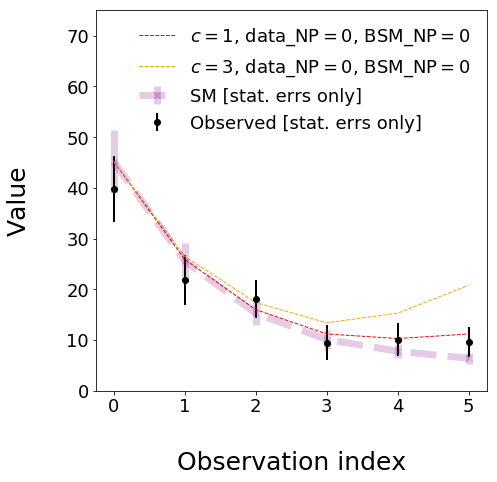

In [9]:
#  Visualise the data

fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(1, 1, 1)
ax.errorbar(np.arange(6), SM_prediction        , yerr=SM_stat_uncertainty    , fmt="x--", markersize=6, linewidth=7., alpha=0.2, color="purple", label="SM [stat. errs only]")
ax.plot    (np.arange(6), get_prediction(1,0), "--", linewidth=1., color="red"   , label="$c=1$, data_NP$=0$, BSM_NP$=0$")
ax.plot    (np.arange(6), get_prediction(3,0), "--", linewidth=1., color="orange", label="$c=3$, data_NP$=0$, BSM_NP$=0$")
ax.errorbar(np.arange(6), measured_values      , yerr=data_stat_uncertainties, fmt="o"  , markersize=6, linewidth=2. , color="black" , label="Observed [stat. errs only]")
ax.tick_params(which="both", labelsize=18)
ax.set_xlabel("Observation index", fontsize=25, labelpad=35)
ax.set_ylabel("Value", fontsize=25, labelpad=35)
ax.set_ylim([0, 75])
ax.legend(loc="upper right", fontsize=18, frameon=False)
plt.show()

The PLR is a function of $c$. It is calculated by
- finding $\text{argmax}_{c',\vec\theta}~ \mathcal{L}\left(\vec x;~c',~ \vec\theta\right)$, where $\vec \theta$ is the vector of our two nuisance parameters (this is the unconditional likelihood maximum, which we find using the iMinuit package)
- scanning $c$ and evaluating $\text{argmax}_{\vec\theta}~ \mathcal{L}\left(\vec x;~c,~ \vec\theta\right)$ at each scanpoint - in this case, a fit is performed to find the optimum values of $\vec\theta$ for each fixed $c'=c$ (this is called marginalising the NPs) 

When PLR reaches a value of $1$, this corresponds to the $1\sigma$ uncertainty threshold. We now use this process to perform a PLR scan.

Best fit values are:
---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | c       |    1.0    |    1.1    |    -1.0    |     1.2    |         |         |       |
| 1 | data_NP |   0.05    |   0.78    |            |            |         |         |       |
| 2 | BSM_NP  |   0.12    |   1.02    |            |            |         |         |       |
---------------------------------------------------------------------------------------------


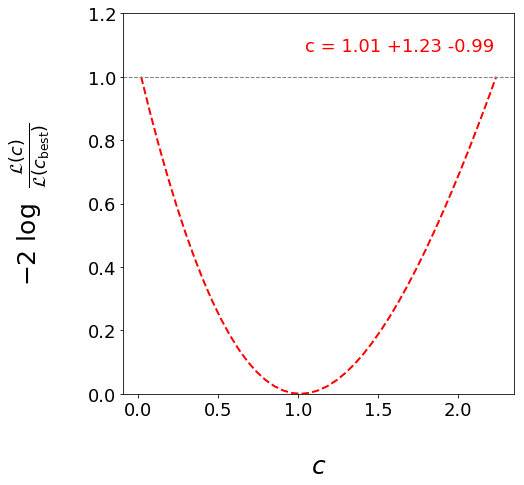

In [10]:
#  Fit for the values of c, data_NP and BSM_NP which maximise likelihood
#  - we run Minos to get accurate asymmetric errors on c

TNLL_best_obs, fit_obj = get_argmin_TNLL(measured_values, minos="c")

#  Extract the fit values and errors

print( "Best fit values are:")
print(fit_obj.get_param_states())

c_best, data_NP_best, BSM_NP_best = fit_obj.values["c"], fit_obj.values["data_NP"], fit_obj.values["BSM_NP"]
c_errs = fit_obj.get_merrors()['c']

#  Perform a scan over c, between -1sigma and +1sigma value, and calculate the likelihood at each point
#  - for each value of c, we fit for the best values of data_NP and BSM_NP

c_scan_values = np.linspace(c_best+c_errs.lower, c_best+c_errs.upper, 41)
L_scan_tot    = [get_argmin_TNLL(measured_values, c=c)[0] for c in c_scan_values]

#  Plot the likelihood scan

fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(1, 1, 1)
ax.plot(c_scan_values     , np.array(L_scan_tot)  - TNLL_best_obs, "--" , linewidth=2, color="red")
ax.axhline(1, linestyle="--", color="grey", linewidth=1.)
ax.tick_params(which="both", labelsize=18)
ax.set_xlabel("$c$", fontsize=25, labelpad=35)
ax.set_ylabel(r"$-2$ $\log$  $\frac{\mathcal{L}\left(c\right)}{\mathcal{L}\left(c_{\rm best}\right)}$", fontsize=25, labelpad=35)
ax.set_ylim([0, 1.2])
ax.text(0.95, 0.9, f"c = {c_best:.2f} +{c_errs.upper:.2f} {c_errs.lower:.2f}", ha="right", color="red", fontsize=18, transform=ax.transAxes)
plt.show()

We will now use psuedo-datasets to demonstrate that the PLR is expected to be distributed like a $\chi^2$ distribution, for several different values of $c$. For each $c$ hypothesis, we generate the psuedo-datasets (by introducing random NP and covariances matrix fluctuations as described below). We then evaluate the PLR at the "true" (i.e. hypopthesised) value of $c$. We then plot these distributions alongside a true $\chi^2$ distribution, to check the validity of Wilks' theorem. 

In [11]:
#  Brief: return num_toys psuedo-datasets around a given hypothesis of c
#    -  we include sources of variance in the covariance matrix, and those treated with NPs
#    -  fluctuations around the covariance matrix are obtained by obtaining its eigenvalues and eigenvectors
#       ... the eigenvectors represent orthogonal fluctuations, and the eigenvectors are the corresponding
#       ... (squared) uncertainty amplitudes. Random fluctuations in these directions are obtained by drawing
#       ... random numbers from a unit Gaussian, and multiplying by the eigenvectors and uncertainty amplitudes
#    -  fluctuations around NPs are obtained by drawing random NP values from a unit Gaussian and evaluating
#       ... the corresponding shift on the measurement
#
def throw_toys (num_toys, c=0.) :
    eigenvals, error_directions = np.linalg.eig(data_plus_SM_covariance)
    error_amplitudes = np.sqrt(eigenvals)
    toy_cov_shifts = np.random.normal(0, 1, (num_toys, len(error_amplitudes)))
    toys = []
    for i in range(num_toys) :
        toy_data_NP, toy_BSM_NP = np.random.normal(0, 1, 2)
        toy = expected_values = get_prediction(c, toy_BSM_NP)
        toy = toy + np.matmul(error_directions, np.multiply(error_amplitudes, toy_cov_shifts[i]))
        if toy_data_NP < 0 : toy = toy + toy_data_NP * data_systematic_uncertainty2_asymmetric_down
        else               : toy = toy - toy_data_NP * data_systematic_uncertainty2_asymmetric_up
        toys.append(toy) 
    return toys

In [12]:
# We now throw toys around different hypothesised values of c, derive the value of PLR(true c) in each one,
# ... and store the resulting distributions

num_toys = 2000
c_scan_points = np.linspace(-2., 4., 7)
toy_PLR_distribution = {}
for c in c_scan_points :
    print(f"Throwing {num_toys} toys for c = {c:.2f}, and evaluating the PLR in each")
    toy_PLRs = []
    for toy in throw_toys(num_toys, c) :
        best_TNLL = get_argmin_TNLL(toy)[0]
        true_TNLL = get_argmin_TNLL(toy, c=c)[0]
        toy_PLRs.append(true_TNLL-best_TNLL)
    toy_PLR_distribution [c] = sorted(toy_PLRs)

Throwing 2000 toys for c = -2.00, and evaluating the PLR in each
Throwing 2000 toys for c = -1.00, and evaluating the PLR in each
Throwing 2000 toys for c = 0.00, and evaluating the PLR in each
Throwing 2000 toys for c = 1.00, and evaluating the PLR in each
Throwing 2000 toys for c = 2.00, and evaluating the PLR in each
Throwing 2000 toys for c = 3.00, and evaluating the PLR in each
Throwing 2000 toys for c = 4.00, and evaluating the PLR in each


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


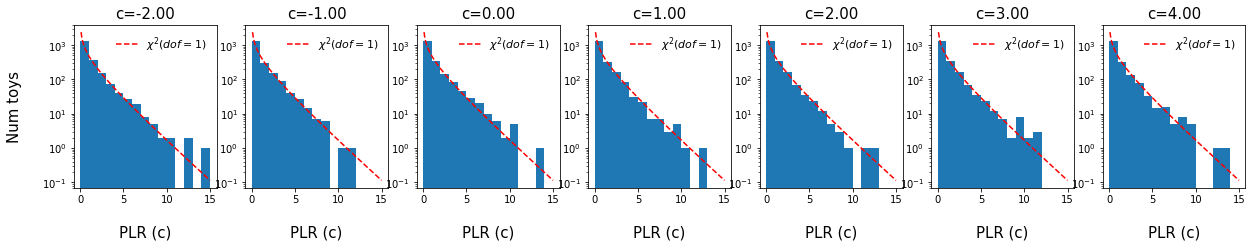

In [13]:
# We plot the expected distributions of PLR(c) for several hypothesised values of c, and compare the distribution
# ... with the Wilks' theorem assumption of a chi2 distribution with one d.o.f.

num_c_scan_points = len(c_scan_points)
fig = plt.figure(figsize=(3*num_c_scan_points,3))
for c_idx, c in enumerate(c_scan_points) :
    ax = fig.add_subplot(1, num_c_scan_points, 1+c_idx)
    ax.hist(toy_PLR_distribution[c], bins=np.linspace(0, 15, 16))
    chi2_eval_points = np.linspace(0, 15, 151)
    ax.plot(chi2_eval_points, num_toys*stats.chi2.pdf(chi2_eval_points, df=1), "--", c="red", label="$\chi^2(dof=1)$")
    ax.set_yscale("log")
    ax.set_title(f"c={c:.2f}", fontsize=15)
    ax.set_xlabel("PLR (c)", fontsize=15, labelpad=20)
    ax.legend(loc="upper right", fontsize=11, frameon=False)
    if c_idx != 0 : continue
    ax.set_ylabel("Num toys", fontsize=15, labelpad=20)
plt.show()

These plots visually demonstrate that Wilks' theorem seems to hold (the agreement is quantified below). We now ask: what value of the PLR corresponds to a 95% confidenve level? We derive this by drawing the PLR cumulative distribution function (this is the $\chi^2$ distribution function) and looking for the value of PLR at which this crosses 95%.

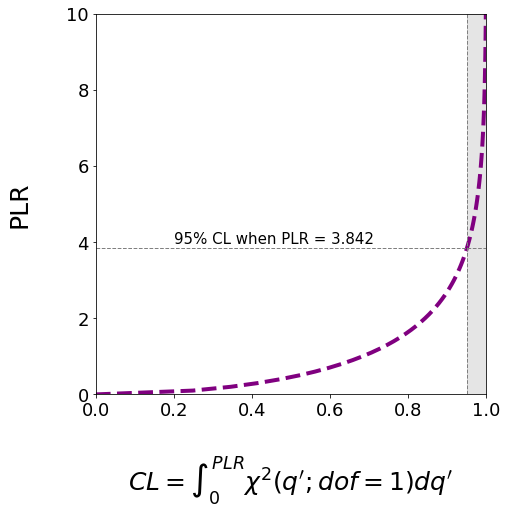

In [14]:
chi2_vals = np.linspace(0, 10, 101)
chi2_cdf  = stats.chi2.cdf(chi2_vals, df=1)
chi2_95pct_cutoff = np.interp([0.95], chi2_cdf, chi2_vals)[0]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(patches.Rectangle((0.95, 0.), 0.05, 1.0, color="grey", alpha=0.2, transform=ax.transAxes))
ax.plot(chi2_cdf, chi2_vals, "--", linewidth=4, c="purple")
ax.set_xlim(0, 1)
ax.set_ylim(np.min(chi2_vals), np.max(chi2_vals))
ax.axhline(chi2_95pct_cutoff, linewidth=1, linestyle="--", color="grey")
ax.axvline(0.95             , linewidth=1, linestyle="--", color="grey")
ax.tick_params(which="both", labelsize=18)
ax.set_xlabel(r"$CL = \int_0^{PLR} \chi^2(q';dof=1)dq'$", fontsize=25, labelpad=35)
ax.set_ylabel(r"PLR", fontsize=25, labelpad=35)
ax.text(0.2, 1.01*chi2_95pct_cutoff, f"95% CL when PLR = {chi2_95pct_cutoff:.3f}", fontsize=15, ha="left", va="bottom")
plt.show()

So, **when we only profile one degree of freedom (one signal parameter)**, a PLR value of 3.842 corresponds to our 95% confidence limit. If Wilks' theorem holds, we should see that approximately 95% of our toys observed a PLR(true c) below this value, and 5% above. If the fraction deviates significantly away from 95%, it means that Wilks' theorem does not hold, and we _must_ use psuedo-experiments to evaluate the confidence levels.

In [15]:
#  Brief: return value and error on an efficieny of the form "a / (a+b)" assuming Poisson errors
#
def get_ratio_with_poisson_err (num, den) :
    fraction = num / den
    if den == 0 : return 1.      , 0.
    if num == 0 : return fraction, 0.
    return fraction, fraction * np.sqrt(1./num - 1./den)
    

#  Brief: return the fraction of values which lie *above* level
#
def get_fraction_of_toys_above_level (toys, level) :
    Nabove, Ntot = len([t for t in toys if t > level]), len(toys)
    return get_ratio_with_poisson_err(Nabove, Ntot)


#  Brief: return the fraction of values which lie *below* level
#
def get_fraction_of_toys_below_level (toys, level) :
    Nbelow, Ntot = len([t for t in toys if t < level]), len(toys)
    return get_ratio_with_poisson_err(Nbelow, Ntot)


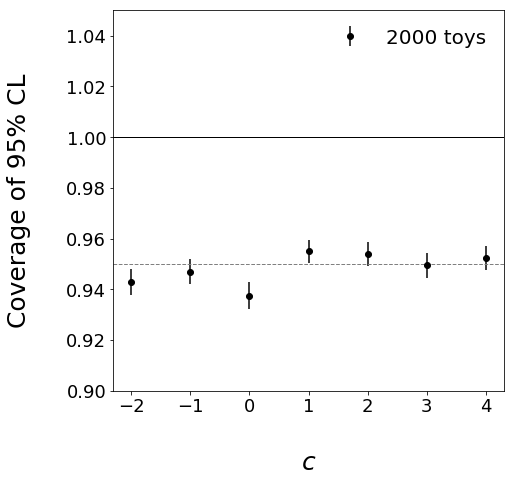

In [16]:
#  Brief: Plot the fraction of toys for which PLR lies below the expected 95% threshold value
#
toys_coverage = {}
for c_idx, c in enumerate(c_scan_points) :
    toys_coverage [c] = get_fraction_of_toys_below_level(toy_PLR_distribution[c], chi2_95pct_cutoff)
    
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(1, 1, 1)
ax.errorbar(c_scan_points, 
            [toys_coverage[c][0] for c in c_scan_points], 
            yerr=[toys_coverage[c][1] for c in c_scan_points], 
            fmt="o", color="k", label=f"{num_toys} toys")
ax.axhline(0.95, linestyle="--", color="grey", linewidth=1.)
ax.axhline(1.00, linestyle="-" , color="k"   , linewidth=1.)
ax.tick_params(which="both", labelsize=18)
ax.set_xlabel("$c$"     , fontsize=25, labelpad=35)
ax.set_ylabel("Coverage of 95% CL", fontsize=25, labelpad=35)
ax.set_ylim([0.9, 1.05])
ax.legend(loc="upper right", fontsize=20, frameon=False)
plt.show()

Now we believe that Wilks' theorem holds, we can use our real observations to scan the PLR and obtain the 95% confidence limits.

In [17]:
#  Brief: return the limits at CL alpha from the given PLR scan
#
def get_limits (c_scan_values, CL_scan_tot, alpha) :
    x_lo, x_hi, y_lo, y_hi = [], [], [], []
    for c, CL in zip(c_scan_values, CL_scan_tot) :
        if (len(y_lo) > 0) and (CL < y_lo[-1]) :
            x_hi.append(c)
            y_hi.append(CL)
            continue
        x_lo.append(c)
        y_lo.append(CL)
    lower_limit = np.interp(alpha, y_lo, x_lo)
    upper_limit = np.interp(alpha, y_hi[::-1], x_hi[::-1])
    return lower_limit, upper_limit
        

Lower 95% confidence limit at c = -0.94
Upper 95% confidence limit at c = 3.86


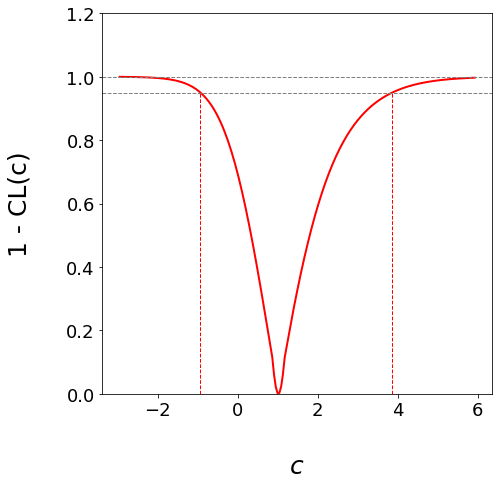

In [18]:
#  Profile the PLR, and use WIlks' theorem to evaluate the CL

c_scan_values = np.linspace(c_best+4*c_errs.lower, c_best+4*c_errs.upper, 201)
PLR_scan_tot  = np.array([get_argmin_TNLL(measured_values, c=c)[0] for c in c_scan_values]) - TNLL_best_obs
CL_scan_tot   = get_Wilks_CL_from_PLR(PLR_scan_tot)

lower_limit, upper_limit = get_limits(c_scan_values, CL_scan_tot, 0.05)
print(f"Lower 95% confidence limit at c = {lower_limit:.2f}")
print(f"Upper 95% confidence limit at c = {upper_limit:.2f}")

#  Plot the CL scan

fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(1, 1, 1)
ax.plot(c_scan_values     , 1. - CL_scan_tot, "-" , linewidth=2, color="red")
ax.axhline(1, linestyle="--", color="grey", linewidth=1.)
ax.axhline(0.95, linestyle="--", color="grey", linewidth=1.)
ax.plot([lower_limit, lower_limit], [0, 0.95], "--", color="red", linewidth=1.)
ax.plot([upper_limit, upper_limit], [0, 0.95], "--", color="red", linewidth=1.)
ax.tick_params(which="both", labelsize=18)
ax.set_xlabel("$c$", fontsize=25, labelpad=35)
ax.set_ylabel(r"1 - CL(c)", fontsize=25, labelpad=35)
ax.set_ylim([0, 1.2])
plt.show()

## 5. The $CL_s$ method


Notes for section:
- Problem with CL method is that we exclude true hypothesis in 5% of cases, even when experiment wasn't sensitive
- When setting one-sided limits, spurious fluctuations (in the opposite direction to the signal model) can lead to a "worse" experiment claiming tighter limits than a more sensitive experiment, some fraction of the time
- Idea: only allow a hypothesis to be excluded, if we expected it to be seperable from the SM
- Method: CLs(c) = CL(c) / CLb, when CL(c) is the CL evaluated using PLR(c) at the c hypothesis, and CLb is the CL evaluated using PLR(c) at the SM hypothesis
- If c and SM are well separable given the expected statistical precision, CLb will tend towards 1 and CLs(c) ~ CL(c). Otherwise, CLb will be < 1 and CLs(c)>CL(c) - i.e. we have penalised the CL in a ad-hoc way. When c=SM, CLs(SM)=1 by construction, so the SM is never excluded.
- Problem: PLR not chi2 distributed under SM hypothesis, so have to derive CLb using toys. Might as well use LR instead of PLR, since we are using toys anyway, so benefit of PLR is less pronounced.


In [19]:
#  Get the toy distribution of -2 log (L(c) / L_SM), assuming the SM to be true, for various values of c

num_toys = 1000
c_scan_points = sorted([c_best+0.5*i*c_errs.lower for i in range(10)] + [0] + [c_best+0.5*i*c_errs.upper for i in range(2,10)])
c_scan_points = np.array(c_scan_points)

toy_PLR_SM_distribution = {}
print(f"Throwing {num_toys} toys for c = 0")
SM_toys = throw_toys(num_toys, 0)
for c in c_scan_points :
    print(f"  - evaluating the LR at c = {c:.2f} for each")
    toy_PLRs = []
    for toy in SM_toys :
        true_TNLL = get_argmin_TNLL(toy, c=c)[0]
        best_TNLL = get_argmin_TNLL(toy)[0]
        toy_PLRs.append(true_TNLL-best_TNLL)
    toy_PLR_SM_distribution [c] = sorted(toy_PLRs)
    

Throwing 1000 toys for c = 0
  - evaluating the LR at c = -3.45 for each
  - evaluating the LR at c = -2.96 for each
  - evaluating the LR at c = -2.46 for each
  - evaluating the LR at c = -1.97 for each
  - evaluating the LR at c = -1.47 for each
  - evaluating the LR at c = -0.97 for each


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


  - evaluating the LR at c = -0.48 for each
  - evaluating the LR at c = 0.00 for each
  - evaluating the LR at c = 0.02 for each
  - evaluating the LR at c = 0.51 for each
  - evaluating the LR at c = 1.01 for each
  - evaluating the LR at c = 2.24 for each
  - evaluating the LR at c = 2.85 for each
  - evaluating the LR at c = 3.47 for each
  - evaluating the LR at c = 4.08 for each
  - evaluating the LR at c = 4.69 for each
  - evaluating the LR at c = 5.31 for each
  - evaluating the LR at c = 5.92 for each
  - evaluating the LR at c = 6.54 for each


In [20]:
#  Get the toy distribution of -2 log (L(c) / L_SM), assuming the profiled values of c to be true

toy_PLR_c_distribution = {}
for c in c_scan_points :
    print(f"Throwing {num_toys} toys for c = {c:.2f}")
    toys = throw_toys(num_toys, c)
    print(f"  - evaluating the LR at c = {c:.2f} for each")
    toy_PLRs = []
    for toy in toys :
        true_TNLL = get_argmin_TNLL(toy, c=c)[0]
        best_TNLL = get_argmin_TNLL(toy)[0]
        toy_PLRs.append(true_TNLL-best_TNLL)
    toy_PLR_c_distribution [c] = sorted(toy_PLRs)

Throwing 1000 toys for c = -3.45
  - evaluating the LR at c = -3.45 for each
Throwing 1000 toys for c = -2.96
  - evaluating the LR at c = -2.96 for each
Throwing 1000 toys for c = -2.46
  - evaluating the LR at c = -2.46 for each
Throwing 1000 toys for c = -1.97
  - evaluating the LR at c = -1.97 for each
Throwing 1000 toys for c = -1.47
  - evaluating the LR at c = -1.47 for each
Throwing 1000 toys for c = -0.97
  - evaluating the LR at c = -0.97 for each
Throwing 1000 toys for c = -0.48
  - evaluating the LR at c = -0.48 for each
Throwing 1000 toys for c = 0.00
  - evaluating the LR at c = 0.00 for each
Throwing 1000 toys for c = 0.02
  - evaluating the LR at c = 0.02 for each
Throwing 1000 toys for c = 0.51
  - evaluating the LR at c = 0.51 for each
Throwing 1000 toys for c = 1.01
  - evaluating the LR at c = 1.01 for each
Throwing 1000 toys for c = 2.24
  - evaluating the LR at c = 2.24 for each
Throwing 1000 toys for c = 2.85
  - evaluating the LR at c = 2.85 for each
Throwing 10

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


Throwing 1000 toys for c = 5.92
  - evaluating the LR at c = 5.92 for each
Throwing 1000 toys for c = 6.54
  - evaluating the LR at c = 6.54 for each


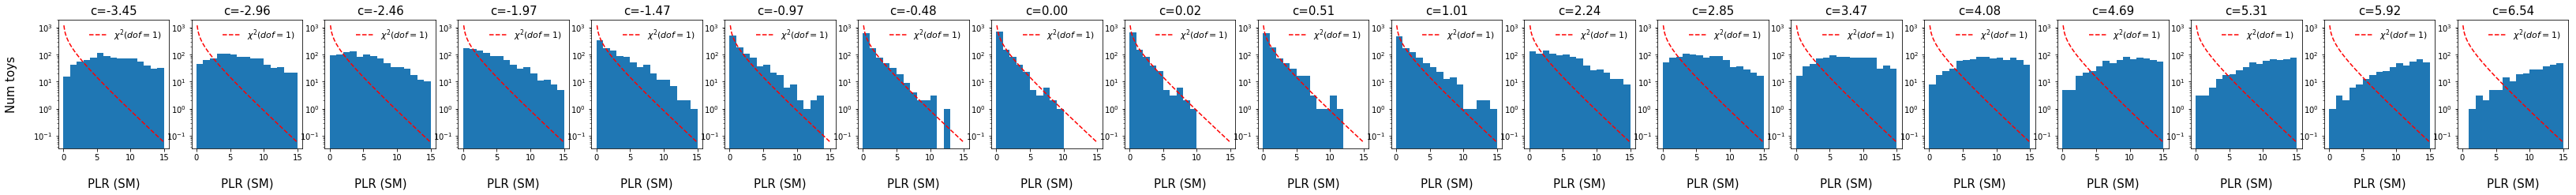

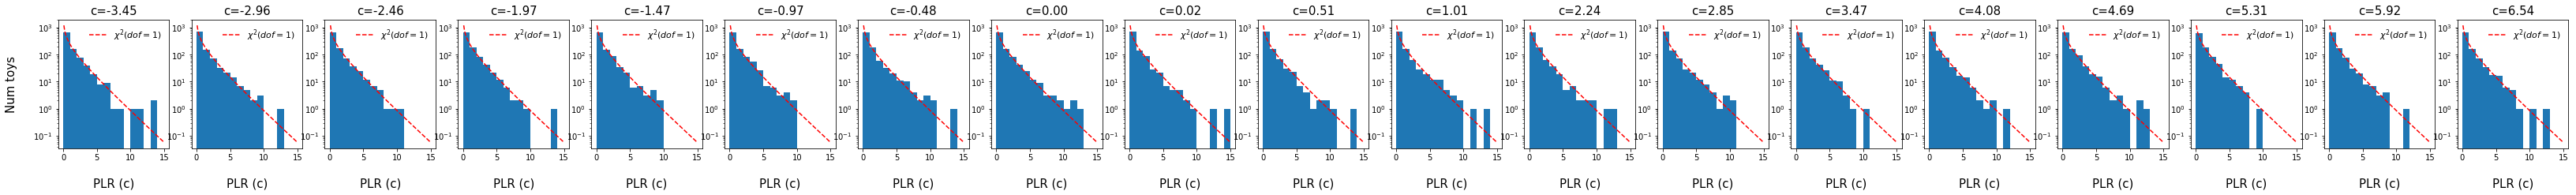

In [21]:
#  Plot the toy distributions derived in the previous two cells

num_c_scan_points = len(c_scan_points)
fig = plt.figure(figsize=(3*num_c_scan_points,3))
for c_idx, c in enumerate(c_scan_points) :
    ax = fig.add_subplot(1, num_c_scan_points, 1+c_idx)
    ax.hist(toy_PLR_SM_distribution[c], bins=np.linspace(0, 15, 16))
    chi2_eval_points = np.linspace(0, 15, 151)
    ax.plot(chi2_eval_points, num_toys*stats.chi2.pdf(chi2_eval_points, df=1), "--", c="red", label="$\chi^2(dof=1)$")
    ax.set_yscale("log")
    ax.set_title(f"c={c:.2f}", fontsize=15)
    ax.set_xlabel("PLR (SM)", fontsize=15, labelpad=20)
    ax.legend(loc="upper right", fontsize=11, frameon=False)
    if c_idx != 0 : continue
    ax.set_ylabel("Num toys", fontsize=15, labelpad=20)
plt.show()

fig = plt.figure(figsize=(3*num_c_scan_points,3))
for c_idx, c in enumerate(c_scan_points) :
    ax = fig.add_subplot(1, num_c_scan_points, 1+c_idx)
    ax.hist(toy_PLR_c_distribution[c], bins=np.linspace(0, 15, 16))
    chi2_eval_points = np.linspace(0, 15, 151)
    ax.plot(chi2_eval_points, num_toys*stats.chi2.pdf(chi2_eval_points, df=1), "--", c="red", label="$\chi^2(dof=1)$")
    ax.set_yscale("log")
    ax.set_title(f"c={c:.2f}", fontsize=15)
    ax.set_xlabel("PLR (c)", fontsize=15, labelpad=20)
    ax.legend(loc="upper right", fontsize=11, frameon=False)
    if c_idx != 0 : continue
    ax.set_ylabel("Num toys", fontsize=15, labelpad=20)
plt.show()

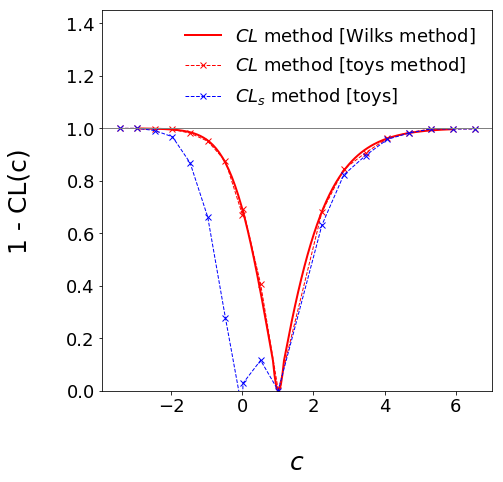

In [22]:
#  In the above toy model, plot the CL and CLs CL curves using the LR test statistic
#  ... also plot the CL curve obtained using the PLR and Wilks' theorem, for reference

PLR_scan = np.array([get_argmin_TNLL(measured_values, c=c)[0] for c in c_scan_points]) - TNLL_best_obs
CL_scan  = np.array([get_fraction_of_toys_above_level(toy_PLR_c_distribution [c], PLR)[0] for c, PLR in zip(c_scan_points, PLR_scan)])
CLb_scan = np.array([get_fraction_of_toys_above_level(toy_PLR_SM_distribution[c], PLR)[0] for c, PLR in zip(c_scan_points, PLR_scan)])
CLs_scan = CL_scan / CLb_scan

#  Plot the CL scan

fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(1, 1, 1)
ax.plot(c_scan_values, 1. - CL_scan_tot, "-" , linewidth=2, color="red" , label="$CL$ method [Wilks method]")
ax.plot(c_scan_points, 1. - CL_scan    , "x--", linewidth=1, color="red" , label="$CL$ method [toys method]")
ax.plot(c_scan_points, 1. - CLs_scan   , "x--", linewidth=1, color="blue", label="$CL_s$ method [toys]")
ax.axhline(1, linestyle="-", color="grey", linewidth=1.)
ax.tick_params(which="both", labelsize=18)
ax.set_xlabel("$c$", fontsize=25, labelpad=35)
ax.set_ylabel(r"1 - CL(c)", fontsize=25, labelpad=35)
ax.set_ylim([0, 1.45])
ax.legend(loc="upper right", fontsize=18, frameon=False)
plt.show()